In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [174]:
### Deep Learning Algorithm
## Deep Neural Network

In [175]:
# Loading data
SC = pd.read_csv('C:/Users/User/Desktop/seungchon.csv', encoding='cp949')
JS = pd.read_csv('C:/Users/User/Desktop/juksan.csv', encoding='cp949')

In [176]:
SC_train = SC.loc[SC['Year']!=2022]
SC_test = SC.loc[SC['Year']==2022]
SC_train_x = SC_train.iloc[:,5:24].drop(labels="Chla", axis=1)
SC_train_y = SC_train.iloc[:,5:24].iloc[:,-7]
SC_test_x = SC_test.iloc[:,5:24].drop(labels="Chla", axis=1)
SC_test_y = SC_test.iloc[:,5:24].iloc[:,-7]

In [177]:
JS_train = JS.loc[JS['Year']!=2022]
JS_test = JS.loc[JS['Year']==2022]
JS_train_x = JS_train.iloc[:,5:24].drop(labels="Chla", axis=1)
JS_train_y = JS_train.iloc[:,5:24].iloc[:,-7]
JS_test_x = JS_test.iloc[:,5:24].drop(labels="Chla", axis=1)
JS_test_y = JS_test.iloc[:,5:24].iloc[:,-7]

In [115]:
# 반드시 tensorflow 먼저 설치
!pip install tensorflow 

In [116]:
!pip install Keras

In [117]:
import tensorflow as tf

In [118]:
from tensorflow.keras import layers  #모듈(변수나 함수를 포함)만 불러오기
from sklearn.preprocessing import StandardScaler, MinMaxScaler  #표준 정규화, 최대-최소 정규화
from keras.layers import Dropout

In [178]:
# DNN model (SC)
model = tf.keras.Sequential()  
model.add(layers.Dense(64, input_shape=(18,)))  
model.add(layers.Activation('relu'))  
model.add(layers.Dense(32))         
model.add(layers.Activation('relu'))
model.add(layers.Dense(16))         
model.add(layers.Activation('relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1))
model.add(layers.Activation('linear')) 

model.compile(
        loss='mse',         # mean_squared_error(평균제곱오차)의 alias
        optimizer='adam',   # 최적화 기법 중 하나
        metrics=["mean_squared_error","mean_absolute_error"])    # 실험 후 관찰하고 싶은 metric 들을 나열함. 

In [179]:
hist = model.fit(
    SC_train_x, SC_train_y,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
8/8 - 0s - loss: 1433.0277 - mean_squared_error: 1433.0277 - mean_absolute_error: 27.6647 - val_loss: 3491.0071 - val_mean_squared_error: 3491.0071 - val_mean_absolute_error: 39.3937 - 399ms/epoch - 50ms/step
Epoch 2/100
8/8 - 0s - loss: 1317.7754 - mean_squared_error: 1317.7754 - mean_absolute_error: 26.3712 - val_loss: 2999.2612 - val_mean_squared_error: 2999.2612 - val_mean_absolute_error: 37.1759 - 23ms/epoch - 3ms/step
Epoch 3/100
8/8 - 0s - loss: 1353.0854 - mean_squared_error: 1353.0854 - mean_absolute_error: 26.5314 - val_loss: 3237.1580 - val_mean_squared_error: 3237.1580 - val_mean_absolute_error: 38.0166 - 21ms/epoch - 3ms/step
Epoch 4/100
8/8 - 0s - loss: 1176.3701 - mean_squared_error: 1176.3701 - mean_absolute_error: 24.7380 - val_loss: 3320.2332 - val_mean_squared_error: 3320.2332 - val_mean_absolute_error: 38.4413 - 21ms/epoch - 3ms/step
Epoch 5/100
8/8 - 0s - loss: 1296.7544 - mean_squared_error: 1296.7544 - mean_absolute_error: 24.5853 - val_loss: 3088.363

Epoch 39/100
8/8 - 0s - loss: 837.0141 - mean_squared_error: 837.0141 - mean_absolute_error: 19.9054 - val_loss: 1999.4447 - val_mean_squared_error: 1999.4447 - val_mean_absolute_error: 28.3073 - 19ms/epoch - 2ms/step
Epoch 40/100
8/8 - 0s - loss: 1001.6228 - mean_squared_error: 1001.6228 - mean_absolute_error: 24.2623 - val_loss: 2622.3381 - val_mean_squared_error: 2622.3381 - val_mean_absolute_error: 35.4639 - 20ms/epoch - 2ms/step
Epoch 41/100
8/8 - 0s - loss: 898.0282 - mean_squared_error: 898.0282 - mean_absolute_error: 22.5774 - val_loss: 2061.8208 - val_mean_squared_error: 2061.8208 - val_mean_absolute_error: 28.9100 - 20ms/epoch - 3ms/step
Epoch 42/100
8/8 - 0s - loss: 963.1152 - mean_squared_error: 963.1152 - mean_absolute_error: 21.5879 - val_loss: 2130.7085 - val_mean_squared_error: 2130.7085 - val_mean_absolute_error: 29.6777 - 21ms/epoch - 3ms/step
Epoch 43/100
8/8 - 0s - loss: 902.4634 - mean_squared_error: 902.4634 - mean_absolute_error: 22.2123 - val_loss: 2439.3103 - v

Epoch 77/100
8/8 - 0s - loss: 747.9745 - mean_squared_error: 747.9745 - mean_absolute_error: 19.0860 - val_loss: 1718.0045 - val_mean_squared_error: 1718.0045 - val_mean_absolute_error: 28.3759 - 20ms/epoch - 2ms/step
Epoch 78/100
8/8 - 0s - loss: 738.0068 - mean_squared_error: 738.0068 - mean_absolute_error: 18.6835 - val_loss: 1717.1754 - val_mean_squared_error: 1717.1754 - val_mean_absolute_error: 28.4814 - 20ms/epoch - 2ms/step
Epoch 79/100
8/8 - 0s - loss: 709.5471 - mean_squared_error: 709.5471 - mean_absolute_error: 19.0573 - val_loss: 1682.9476 - val_mean_squared_error: 1682.9476 - val_mean_absolute_error: 28.1386 - 20ms/epoch - 3ms/step
Epoch 80/100
8/8 - 0s - loss: 741.5578 - mean_squared_error: 741.5578 - mean_absolute_error: 19.8457 - val_loss: 1431.6141 - val_mean_squared_error: 1431.6141 - val_mean_absolute_error: 24.4284 - 21ms/epoch - 3ms/step
Epoch 81/100
8/8 - 0s - loss: 685.2761 - mean_squared_error: 685.2761 - mean_absolute_error: 19.2830 - val_loss: 2255.8826 - val

In [180]:
# 테스트 데이터 입력
scores = model.evaluate(SC_test_x, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 610.5303 - mean_squared_error: 610.5303 - mean_absolute_error: 20.1295
test_loss:  610.5303344726562
test_mae:  610.5303344726562


In [181]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                1216      
                                                                 
 activation_28 (Activation)  (None, 64)                0         
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 activation_29 (Activation)  (None, 32)                0         
                                                                 
 dense_38 (Dense)            (None, 16)                528       
                                                                 
 activation_30 (Activation)  (None, 16)                0         
                                                                 
 dropout_15 (Dropout)        (None, 16)              

In [123]:
SC_test_y_pred_DNN = model.predict(SC_test_x)
SC_test_y_pred_DNN

2/2 [==============================] - 0s 1000us/step


array([[ 58.862732],
       [ 54.31632 ],
       [ 50.123875],
       [ 54.276066],
       [ 57.684605],
       [ 69.92382 ],
       [ 69.57946 ],
       [ 52.015003],
       [ 85.21552 ],
       [ 81.139824],
       [ 37.66941 ],
       [ 31.674809],
       [ 53.198   ],
       [105.25611 ],
       [111.226585],
       [ 50.576916],
       [ 81.97858 ],
       [ 97.95163 ],
       [ 77.267204],
       [ 91.11555 ],
       [111.60715 ],
       [ 89.98427 ],
       [ 64.431206],
       [ 73.15811 ],
       [ 63.911816],
       [ 75.0465  ],
       [ 74.88923 ],
       [ 77.36661 ],
       [ 17.017921],
       [ 47.225445],
       [ 27.480495],
       [112.50324 ],
       [ 25.13723 ],
       [ 59.07709 ],
       [ 83.38119 ],
       [ 28.415691],
       [ 64.65232 ],
       [ 51.272217],
       [ 88.81219 ],
       [ 56.738247],
       [ 67.45461 ],
       [ 81.0146  ],
       [ 76.130165],
       [ 48.602505],
       [ 49.849075],
       [ 42.534477],
       [ 37.517616],
       [ 35.4

In [124]:
# checking loss
import matplotlib.pyplot as plt

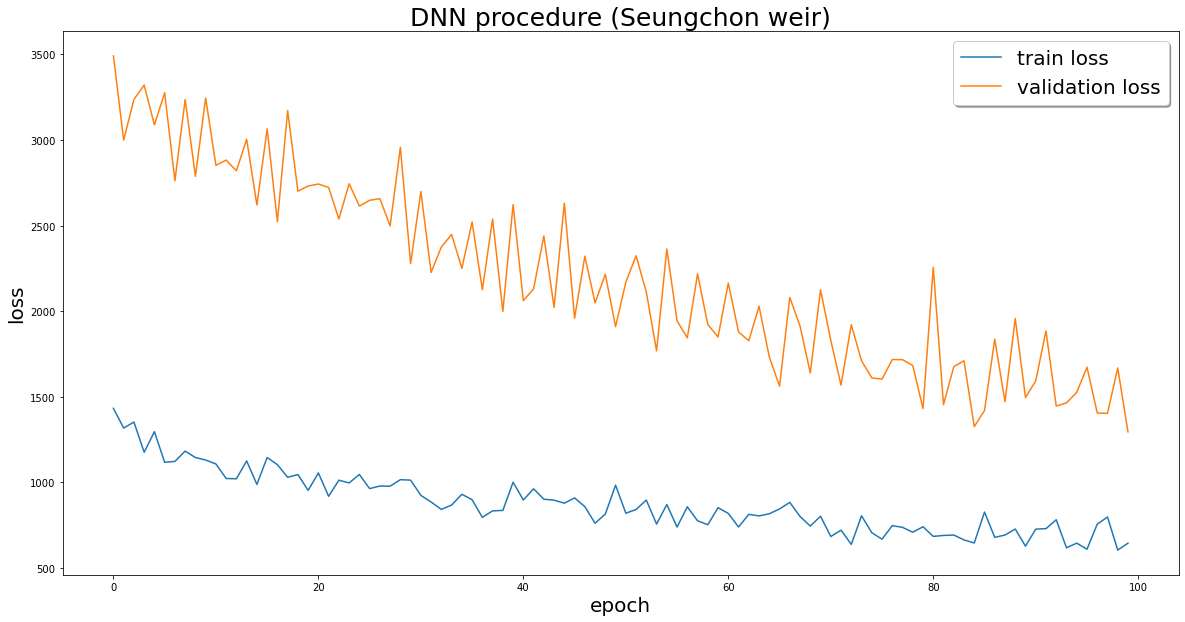

In [182]:
plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('DNN procedure (Seungchon weir)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('DNN SC_python.png')

In [183]:
# DNN model (JS)
model = tf.keras.Sequential()  
model.add(layers.Dense(64, input_shape=(18,)))  
model.add(layers.Activation('relu'))  
model.add(layers.Dense(32))         
model.add(layers.Activation('relu'))
model.add(layers.Dense(16))         
model.add(layers.Activation('relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1))
model.add(layers.Activation('linear')) 

model.compile(
        loss='mse',         # mean_squared_error(평균제곱오차)의 alias
        optimizer='adam',   # 최적화 기법 중 하나
        metrics=["mean_squared_error","mean_absolute_error"])    # 실험 후 관찰하고 싶은 metric 들을 나열함. 

In [184]:
hist = model.fit(
    JS_train_x, JS_train_y,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
8/8 - 0s - loss: 2205.0190 - mean_squared_error: 2205.0190 - mean_absolute_error: 33.3798 - val_loss: 4443.2671 - val_mean_squared_error: 4443.2671 - val_mean_absolute_error: 44.5845 - 404ms/epoch - 50ms/step
Epoch 2/100
8/8 - 0s - loss: 1490.1851 - mean_squared_error: 1490.1852 - mean_absolute_error: 29.1939 - val_loss: 3564.9785 - val_mean_squared_error: 3564.9785 - val_mean_absolute_error: 38.3814 - 25ms/epoch - 3ms/step
Epoch 3/100
8/8 - 0s - loss: 1481.7157 - mean_squared_error: 1481.7157 - mean_absolute_error: 30.7446 - val_loss: 3440.0447 - val_mean_squared_error: 3440.0447 - val_mean_absolute_error: 37.7861 - 21ms/epoch - 3ms/step
Epoch 4/100
8/8 - 0s - loss: 1525.2494 - mean_squared_error: 1525.2494 - mean_absolute_error: 29.6037 - val_loss: 3824.7009 - val_mean_squared_error: 3824.7009 - val_mean_absolute_error: 40.2002 - 22ms/epoch - 3ms/step
Epoch 5/100
8/8 - 0s - loss: 1402.0316 - mean_squared_error: 1402.0316 - mean_absolute_error: 27.9416 - val_loss: 3766.956

Epoch 39/100
8/8 - 0s - loss: 930.4407 - mean_squared_error: 930.4407 - mean_absolute_error: 22.2301 - val_loss: 2910.0684 - val_mean_squared_error: 2910.0684 - val_mean_absolute_error: 33.5820 - 20ms/epoch - 3ms/step
Epoch 40/100
8/8 - 0s - loss: 914.3515 - mean_squared_error: 914.3515 - mean_absolute_error: 20.3822 - val_loss: 2723.0149 - val_mean_squared_error: 2723.0149 - val_mean_absolute_error: 32.1981 - 20ms/epoch - 3ms/step
Epoch 41/100
8/8 - 0s - loss: 739.8254 - mean_squared_error: 739.8254 - mean_absolute_error: 20.0621 - val_loss: 2737.5593 - val_mean_squared_error: 2737.5593 - val_mean_absolute_error: 32.3834 - 20ms/epoch - 2ms/step
Epoch 42/100
8/8 - 0s - loss: 713.1408 - mean_squared_error: 713.1408 - mean_absolute_error: 18.7380 - val_loss: 2570.2070 - val_mean_squared_error: 2570.2070 - val_mean_absolute_error: 31.2321 - 19ms/epoch - 2ms/step
Epoch 43/100
8/8 - 0s - loss: 634.2002 - mean_squared_error: 634.2002 - mean_absolute_error: 19.3001 - val_loss: 2709.6567 - val

Epoch 77/100
8/8 - 0s - loss: 617.7956 - mean_squared_error: 617.7956 - mean_absolute_error: 17.3415 - val_loss: 2295.5664 - val_mean_squared_error: 2295.5664 - val_mean_absolute_error: 29.8517 - 21ms/epoch - 3ms/step
Epoch 78/100
8/8 - 0s - loss: 689.7688 - mean_squared_error: 689.7688 - mean_absolute_error: 18.5242 - val_loss: 2856.9785 - val_mean_squared_error: 2856.9785 - val_mean_absolute_error: 34.8138 - 20ms/epoch - 3ms/step
Epoch 79/100
8/8 - 0s - loss: 672.0069 - mean_squared_error: 672.0069 - mean_absolute_error: 18.3247 - val_loss: 2374.7917 - val_mean_squared_error: 2374.7917 - val_mean_absolute_error: 30.5472 - 20ms/epoch - 3ms/step
Epoch 80/100
8/8 - 0s - loss: 726.7485 - mean_squared_error: 726.7485 - mean_absolute_error: 19.4067 - val_loss: 2483.3240 - val_mean_squared_error: 2483.3240 - val_mean_absolute_error: 31.4707 - 21ms/epoch - 3ms/step
Epoch 81/100
8/8 - 0s - loss: 680.3243 - mean_squared_error: 680.3243 - mean_absolute_error: 17.9351 - val_loss: 2466.0984 - val

In [185]:
# 테스트 데이터 입력
scores = model.evaluate(JS_test_x, JS_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 370.4556 - mean_squared_error: 370.4556 - mean_absolute_error: 15.2873
test_loss:  370.45562744140625
test_mae:  370.45562744140625


In [186]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                1216      
                                                                 
 activation_32 (Activation)  (None, 64)                0         
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 activation_33 (Activation)  (None, 32)                0         
                                                                 
 dense_42 (Dense)            (None, 16)                528       
                                                                 
 activation_34 (Activation)  (None, 16)                0         
                                                                 
 dropout_16 (Dropout)        (None, 16)              

In [187]:
JS_test_y_pred_DNN = model.predict(JS_test_x)
JS_test_y_pred_DNN

2/2 [==============================] - 0s 999us/step


array([[61.372517],
       [62.55267 ],
       [77.07768 ],
       [78.32419 ],
       [46.615665],
       [38.327946],
       [31.417992],
       [20.734636],
       [29.328556],
       [20.364836],
       [21.808065],
       [17.83103 ],
       [62.687927],
       [72.10441 ],
       [52.80708 ],
       [85.83945 ],
       [65.88739 ],
       [21.186913],
       [35.635456],
       [24.462652],
       [55.488964],
       [46.752533],
       [29.916147],
       [41.502068],
       [45.68289 ],
       [50.34958 ],
       [70.16634 ],
       [44.385468],
       [20.18839 ],
       [54.165115],
       [27.737585],
       [43.387936],
       [41.23703 ],
       [51.0931  ],
       [62.47645 ],
       [50.173916],
       [54.25599 ],
       [61.476986],
       [74.586655],
       [56.01024 ],
       [76.10979 ],
       [56.622494],
       [48.85805 ],
       [25.491837],
       [25.616817],
       [29.25691 ],
       [22.727633],
       [20.407522],
       [48.100063],
       [38.800396]],

In [171]:
# checking loss
import matplotlib.pyplot as plt

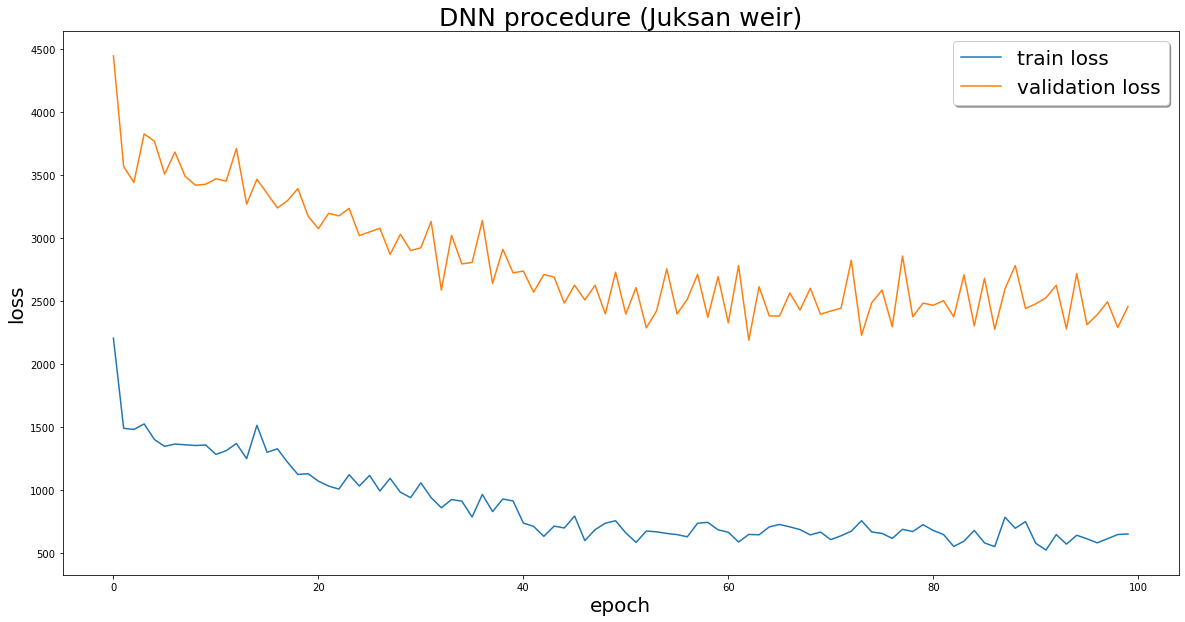

In [188]:
plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('DNN procedure (Juksan weir)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('DNN JS_python.png')

In [132]:
## Convolutional Neural Network
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

In [189]:
# CNN model (SC)
SC_train_x_CNN = SC_train_x.to_numpy().reshape(SC_train_x.shape[0], SC_train_x.shape[1], 1) 
SC_test_x_CNN = SC_test_x.to_numpy().reshape(SC_test_x.shape[0], SC_test_x.shape[1], 1) 

In [190]:
model = tf.keras.Sequential()  
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(18, 1)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(
        loss='mse',         # mean_squared_error(평균제곱오차)의 alias
        optimizer='adam',   # 최적화 기법 중 하나
        metrics=["mean_squared_error","mean_absolute_error"])    # 실험 후 관찰하고 싶은 metric 들을 나열함.

In [191]:
hist = model.fit(
    SC_train_x_CNN, SC_train_y,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
8/8 - 0s - loss: 1631.8344 - mean_squared_error: 1631.8344 - mean_absolute_error: 29.4632 - val_loss: 3009.5540 - val_mean_squared_error: 3009.5540 - val_mean_absolute_error: 37.8674 - 447ms/epoch - 56ms/step
Epoch 2/100
8/8 - 0s - loss: 1369.8528 - mean_squared_error: 1369.8528 - mean_absolute_error: 27.5456 - val_loss: 3774.7673 - val_mean_squared_error: 3774.7673 - val_mean_absolute_error: 41.1969 - 28ms/epoch - 3ms/step
Epoch 3/100
8/8 - 0s - loss: 1263.7056 - mean_squared_error: 1263.7056 - mean_absolute_error: 25.4922 - val_loss: 3443.0405 - val_mean_squared_error: 3443.0405 - val_mean_absolute_error: 39.1208 - 26ms/epoch - 3ms/step
Epoch 4/100
8/8 - 0s - loss: 1244.0607 - mean_squared_error: 1244.0607 - mean_absolute_error: 26.1809 - val_loss: 3135.6667 - val_mean_squared_error: 3135.6667 - val_mean_absolute_error: 37.4968 - 26ms/epoch - 3ms/step
Epoch 5/100
8/8 - 0s - loss: 1269.9796 - mean_squared_error: 1269.9796 - mean_absolute_error: 26.0882 - val_loss: 3445.622

Epoch 39/100
8/8 - 0s - loss: 997.8846 - mean_squared_error: 997.8846 - mean_absolute_error: 22.1851 - val_loss: 2701.3833 - val_mean_squared_error: 2701.3833 - val_mean_absolute_error: 33.3765 - 26ms/epoch - 3ms/step
Epoch 40/100
8/8 - 0s - loss: 1030.3740 - mean_squared_error: 1030.3740 - mean_absolute_error: 22.7269 - val_loss: 2732.7639 - val_mean_squared_error: 2732.7639 - val_mean_absolute_error: 33.6185 - 26ms/epoch - 3ms/step
Epoch 41/100
8/8 - 0s - loss: 915.6166 - mean_squared_error: 915.6166 - mean_absolute_error: 21.8906 - val_loss: 2848.4893 - val_mean_squared_error: 2848.4893 - val_mean_absolute_error: 34.7401 - 26ms/epoch - 3ms/step
Epoch 42/100
8/8 - 0s - loss: 935.0757 - mean_squared_error: 935.0757 - mean_absolute_error: 22.5961 - val_loss: 2933.6072 - val_mean_squared_error: 2933.6072 - val_mean_absolute_error: 35.6828 - 26ms/epoch - 3ms/step
Epoch 43/100
8/8 - 0s - loss: 1005.5928 - mean_squared_error: 1005.5928 - mean_absolute_error: 22.4283 - val_loss: 2909.5671 -

Epoch 77/100
8/8 - 0s - loss: 751.3770 - mean_squared_error: 751.3770 - mean_absolute_error: 20.0904 - val_loss: 2163.9062 - val_mean_squared_error: 2163.9062 - val_mean_absolute_error: 30.7727 - 26ms/epoch - 3ms/step
Epoch 78/100
8/8 - 0s - loss: 801.4627 - mean_squared_error: 801.4627 - mean_absolute_error: 20.7146 - val_loss: 2347.8557 - val_mean_squared_error: 2347.8557 - val_mean_absolute_error: 33.3352 - 25ms/epoch - 3ms/step
Epoch 79/100
8/8 - 0s - loss: 769.7948 - mean_squared_error: 769.7948 - mean_absolute_error: 19.9787 - val_loss: 2207.2207 - val_mean_squared_error: 2207.2207 - val_mean_absolute_error: 31.4538 - 24ms/epoch - 3ms/step
Epoch 80/100
8/8 - 0s - loss: 725.1606 - mean_squared_error: 725.1606 - mean_absolute_error: 19.6388 - val_loss: 2182.6521 - val_mean_squared_error: 2182.6521 - val_mean_absolute_error: 31.3212 - 25ms/epoch - 3ms/step
Epoch 81/100
8/8 - 0s - loss: 754.8095 - mean_squared_error: 754.8095 - mean_absolute_error: 19.7621 - val_loss: 2331.0464 - val

In [192]:
# 테스트 데이터 입력
scores = model.evaluate(SC_test_x_CNN, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 713.0848 - mean_squared_error: 713.0848 - mean_absolute_error: 22.6523
test_loss:  713.0848388671875
test_mae:  713.0848388671875


In [193]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 17, 64)            192       
                                                                 
 conv1d_9 (Conv1D)           (None, 15, 32)            6176      
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 7, 32)             0         
 g1D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 7, 32)             0         
                                                                 
 flatten_4 (Flatten)         (None, 224)               0         
                                                                 
 dense_44 (Dense)            (None, 32)                7200      
                                                     

In [194]:
SC_test_y_pred_CNN = model.predict(SC_test_x_CNN)
SC_test_y_pred_CNN

2/2 [==============================] - 0s 2ms/step


array([[ 52.187023],
       [ 48.27016 ],
       [ 40.0627  ],
       [ 46.715233],
       [ 51.31059 ],
       [ 61.099518],
       [ 59.528038],
       [ 45.66264 ],
       [ 75.17436 ],
       [ 79.29337 ],
       [ 36.28155 ],
       [ 27.24482 ],
       [ 52.907673],
       [ 96.583466],
       [ 94.86273 ],
       [ 44.64237 ],
       [ 48.900253],
       [ 91.57661 ],
       [ 69.165764],
       [ 91.156525],
       [112.26695 ],
       [ 94.18663 ],
       [ 48.62975 ],
       [ 79.94797 ],
       [ 78.70211 ],
       [ 74.34506 ],
       [ 84.09895 ],
       [ 65.33827 ],
       [ 19.034037],
       [ 44.99984 ],
       [ 23.53469 ],
       [ 92.85254 ],
       [ 23.414597],
       [ 56.53664 ],
       [ 78.324265],
       [ 15.943298],
       [ 59.84418 ],
       [ 54.712048],
       [ 85.21683 ],
       [ 53.595554],
       [ 73.6031  ],
       [ 85.89533 ],
       [ 83.83125 ],
       [ 49.090977],
       [ 47.77699 ],
       [ 37.208855],
       [ 42.868656],
       [ 31.5

In [139]:
# checking loss
import matplotlib.pyplot as plt

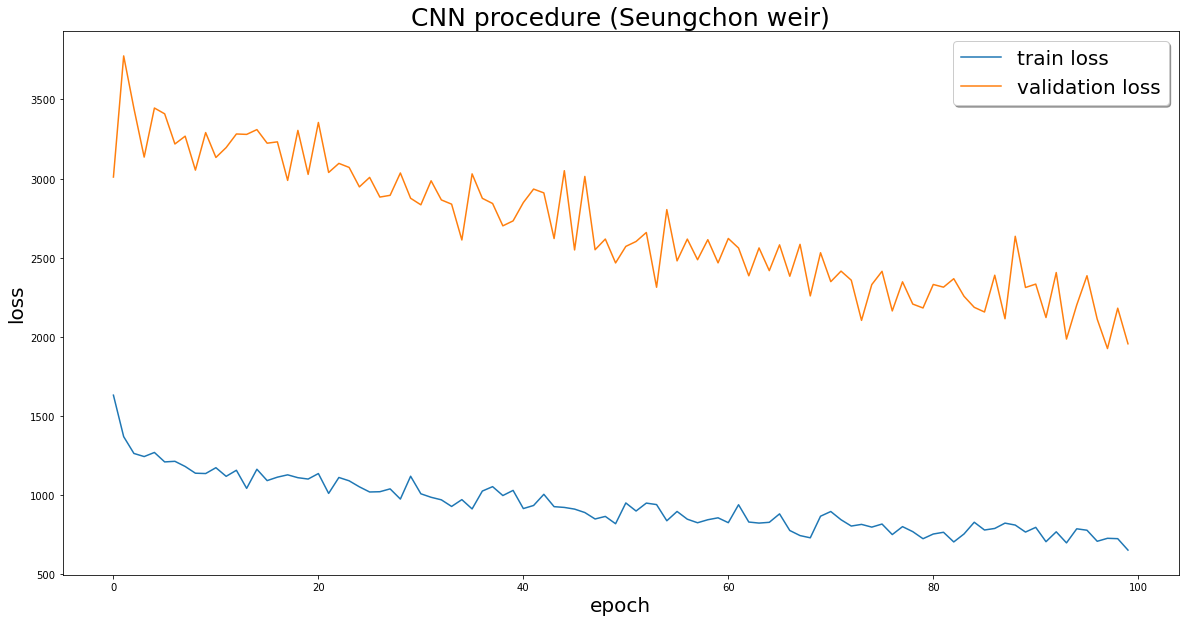

In [195]:
plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('CNN procedure (Seungchon weir)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('CNN SC_python.png')

In [196]:
# CNN model (JS)
JS_train_x_CNN = JS_train_x.to_numpy().reshape(JS_train_x.shape[0], JS_train_x.shape[1], 1) 
JS_test_x_CNN = JS_test_x.to_numpy().reshape(JS_test_x.shape[0], JS_test_x.shape[1], 1) 

In [197]:
model = tf.keras.Sequential()  
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(18, 1)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(
        loss='mse',         # mean_squared_error(평균제곱오차)의 alias
        optimizer='adam',   # 최적화 기법 중 하나
        metrics=["mean_squared_error","mean_absolute_error"])    # 실험 후 관찰하고 싶은 metric 들을 나열함.

In [198]:
hist = model.fit(
    JS_train_x_CNN, JS_train_y,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
8/8 - 0s - loss: 1929.5872 - mean_squared_error: 1929.5872 - mean_absolute_error: 32.2352 - val_loss: 2989.6506 - val_mean_squared_error: 2989.6506 - val_mean_absolute_error: 37.0145 - 444ms/epoch - 56ms/step
Epoch 2/100
8/8 - 0s - loss: 1546.2111 - mean_squared_error: 1546.2111 - mean_absolute_error: 30.8701 - val_loss: 3809.5564 - val_mean_squared_error: 3809.5564 - val_mean_absolute_error: 40.1389 - 29ms/epoch - 4ms/step
Epoch 3/100
8/8 - 0s - loss: 1433.9052 - mean_squared_error: 1433.9052 - mean_absolute_error: 28.2491 - val_loss: 3938.1650 - val_mean_squared_error: 3938.1650 - val_mean_absolute_error: 41.1197 - 27ms/epoch - 3ms/step
Epoch 4/100
8/8 - 0s - loss: 1264.2118 - mean_squared_error: 1264.2118 - mean_absolute_error: 26.2055 - val_loss: 3323.1829 - val_mean_squared_error: 3323.1829 - val_mean_absolute_error: 37.5024 - 26ms/epoch - 3ms/step
Epoch 5/100
8/8 - 0s - loss: 1393.3694 - mean_squared_error: 1393.3694 - mean_absolute_error: 29.0994 - val_loss: 3545.844

Epoch 39/100
8/8 - 0s - loss: 880.2816 - mean_squared_error: 880.2816 - mean_absolute_error: 22.6276 - val_loss: 3113.0525 - val_mean_squared_error: 3113.0525 - val_mean_absolute_error: 35.2089 - 26ms/epoch - 3ms/step
Epoch 40/100
8/8 - 0s - loss: 839.9280 - mean_squared_error: 839.9280 - mean_absolute_error: 21.0363 - val_loss: 2880.9673 - val_mean_squared_error: 2880.9673 - val_mean_absolute_error: 33.3610 - 24ms/epoch - 3ms/step
Epoch 41/100
8/8 - 0s - loss: 774.0687 - mean_squared_error: 774.0687 - mean_absolute_error: 20.8450 - val_loss: 2784.6162 - val_mean_squared_error: 2784.6162 - val_mean_absolute_error: 32.7402 - 26ms/epoch - 3ms/step
Epoch 42/100
8/8 - 0s - loss: 806.2535 - mean_squared_error: 806.2535 - mean_absolute_error: 21.7132 - val_loss: 2970.9998 - val_mean_squared_error: 2970.9998 - val_mean_absolute_error: 34.0675 - 26ms/epoch - 3ms/step
Epoch 43/100
8/8 - 0s - loss: 799.3630 - mean_squared_error: 799.3630 - mean_absolute_error: 20.3673 - val_loss: 2877.0891 - val

Epoch 77/100
8/8 - 0s - loss: 736.1557 - mean_squared_error: 736.1557 - mean_absolute_error: 21.7975 - val_loss: 2546.9199 - val_mean_squared_error: 2546.9199 - val_mean_absolute_error: 31.0986 - 26ms/epoch - 3ms/step
Epoch 78/100
8/8 - 0s - loss: 739.7943 - mean_squared_error: 739.7943 - mean_absolute_error: 19.7208 - val_loss: 3075.8220 - val_mean_squared_error: 3075.8220 - val_mean_absolute_error: 35.0617 - 25ms/epoch - 3ms/step
Epoch 79/100
8/8 - 0s - loss: 742.2933 - mean_squared_error: 742.2933 - mean_absolute_error: 20.1088 - val_loss: 2404.1460 - val_mean_squared_error: 2404.1460 - val_mean_absolute_error: 30.2965 - 25ms/epoch - 3ms/step
Epoch 80/100
8/8 - 0s - loss: 610.1816 - mean_squared_error: 610.1816 - mean_absolute_error: 18.6950 - val_loss: 2728.1777 - val_mean_squared_error: 2728.1777 - val_mean_absolute_error: 32.3720 - 25ms/epoch - 3ms/step
Epoch 81/100
8/8 - 0s - loss: 752.1671 - mean_squared_error: 752.1671 - mean_absolute_error: 20.0093 - val_loss: 2614.5581 - val

In [199]:
# 테스트 데이터 입력
scores = model.evaluate(JS_test_x_CNN, JS_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 473.0323 - mean_squared_error: 473.0323 - mean_absolute_error: 18.0802
test_loss:  473.0323486328125
test_mae:  473.0323486328125


In [200]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 17, 64)            192       
                                                                 
 conv1d_11 (Conv1D)          (None, 15, 32)            6176      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 7, 32)             0         
 g1D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 7, 32)             0         
                                                                 
 flatten_5 (Flatten)         (None, 224)               0         
                                                                 
 dense_46 (Dense)            (None, 32)                7200      
                                                     

In [201]:
JS_test_y_pred_CNN = model.predict(JS_test_x_CNN)
JS_test_y_pred_CNN

2/2 [==============================] - 0s 1ms/step


array([[61.278465],
       [65.89586 ],
       [77.4598  ],
       [78.48742 ],
       [53.548096],
       [51.62001 ],
       [42.146515],
       [30.620409],
       [41.395805],
       [29.777987],
       [32.758755],
       [16.31293 ],
       [47.424637],
       [62.112946],
       [52.597237],
       [70.50722 ],
       [45.680916],
       [21.41776 ],
       [38.193035],
       [33.15447 ],
       [58.53273 ],
       [51.265633],
       [27.746565],
       [44.88571 ],
       [55.32908 ],
       [44.986256],
       [68.708916],
       [43.128693],
       [15.690756],
       [48.31961 ],
       [22.399324],
       [57.66095 ],
       [40.67075 ],
       [46.974022],
       [60.778755],
       [34.543022],
       [54.330173],
       [64.68815 ],
       [73.38261 ],
       [56.334908],
       [66.67191 ],
       [55.45089 ],
       [62.18935 ],
       [47.114185],
       [46.604496],
       [49.03997 ],
       [38.07327 ],
       [26.254179],
       [55.648354],
       [50.26753 ]],

In [147]:
# checking loss
import matplotlib.pyplot as plt

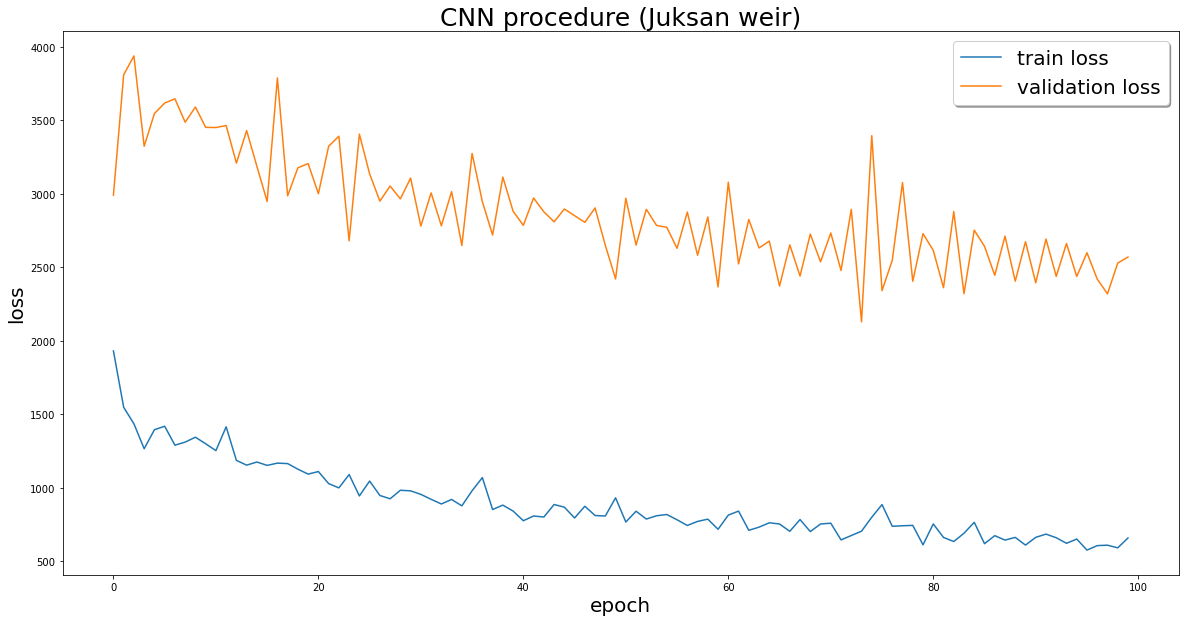

In [202]:
plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('CNN procedure (Juksan weir)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('CNN JS_python.png')

In [149]:
### Machine Learning Algorithm
## Extreme Gradient Boosting
!pip install xgboost

In [150]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error as MSE

In [203]:
## XGBoost model (SC)
regressor=xgb.XGBRegressor(eval_metric='rmse')
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}
search = GridSearchCV(regressor, param_grid, cv=5).fit(SC_train_x, SC_train_y)
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 5, 'n_estimators': 600}


In [204]:
regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmse')

regressor.fit(SC_train_x, SC_train_y)

SC_test_y_pred_xgb = regressor.predict(SC_test_x)
SC_test_y_pred_xgb

array([ 74.52631 ,  60.612858,  73.65756 ,  70.874565,  67.35715 ,
        91.90443 ,  76.68793 ,  65.824394, 111.43699 , 131.64368 ,
        26.882275,  35.75189 ,  75.55092 , 182.65732 , 131.38208 ,
        58.37984 ,  74.880554,  33.033985,  74.8228  , 118.555405,
       142.02943 , 120.19482 ,  69.63183 ,  88.89545 ,  92.92151 ,
        52.974003,  64.2177  ,  62.184875,  30.446218,  46.03933 ,
        31.328312,  96.97114 ,  39.06991 ,  55.206345,  75.595024,
        63.71001 ,  67.69882 ,  57.238426, 135.87012 ,  64.39922 ,
        81.67506 , 105.41551 , 103.003204,  49.939106,  50.248737,
        46.146393,  42.056065,  38.173275,  48.471836,  51.77171 ],
      dtype=float32)

In [205]:
## XGBoost model (JS)
regressor=xgb.XGBRegressor(eval_metric='rmse')
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}
search = GridSearchCV(regressor, param_grid, cv=5).fit(JS_train_x, JS_train_y)
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 700}


In [206]:
regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmse')

regressor.fit(JS_train_x, JS_train_y)

JS_test_y_pred_xgb = regressor.predict(JS_test_x)
JS_test_y_pred_xgb

array([ 77.12253 ,  65.80073 , 105.4222  , 115.89675 ,  48.797928,
        40.40338 ,  51.25797 ,  44.943924,  40.778435,  30.7406  ,
        44.32552 ,  32.607872,  96.85335 ,  74.21722 ,  66.83014 ,
        79.632965,  76.12168 ,  36.528336,  42.64316 ,  45.64476 ,
        86.03087 ,  77.463066,  42.30404 ,  64.908295,  73.21732 ,
        28.248022,  75.7069  ,  49.082405,  36.757084,  52.841595,
        21.38312 ,  60.737583,  53.125072,  50.11267 ,  42.777245,
        32.42595 ,  81.898796,  55.39855 ,  85.67532 ,  51.30398 ,
        59.775673,  35.85241 ,  35.080837,  36.733925,  26.446198,
        59.193336,  30.673712,  29.108013,  46.230755,  38.833023],
      dtype=float32)

In [207]:
### write data
import pandas as pd

df_SC = pd.DataFrame([SC_test_y_pred_xgb, SC_test_y_pred_DNN, SC_test_y_pred_CNN]).T
df_SC.columns = ['XGBoost', 'DNN', 'CNN']
df_SC.to_csv('df_SC_res.csv', index=False, encoding='cp949') 

In [208]:
df_JS = pd.DataFrame([JS_test_y_pred_xgb, JS_test_y_pred_DNN, JS_test_y_pred_CNN]).T
df_JS.columns = ['XGBoost', 'DNN', 'CNN']
df_JS.to_csv('df_JS_res.csv', index=False, encoding='cp949') 